# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [9]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
print(data.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


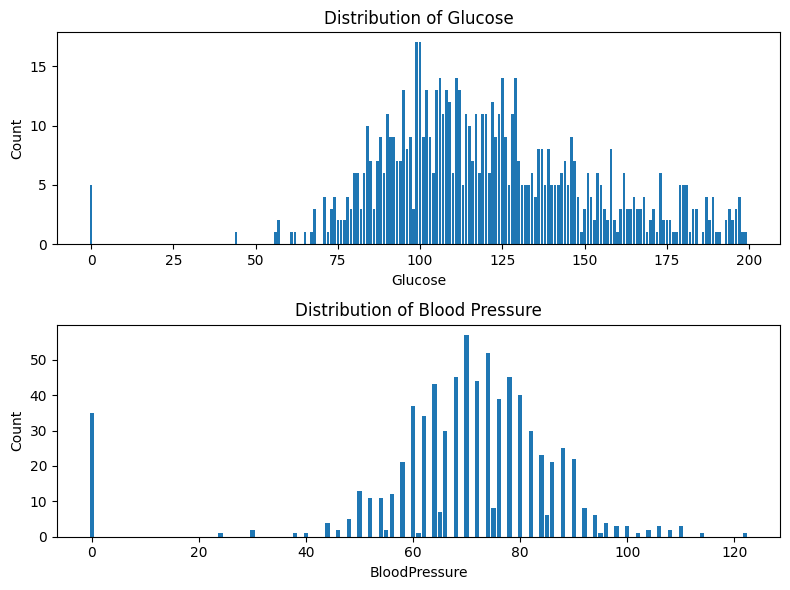

In [15]:


import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes.csv')
glucose_counts = data['Glucose'].value_counts().sort_index()
blood_pressure_counts = data['BloodPressure'].value_counts().sort_index()
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
axes[0].bar(glucose_counts.index, glucose_counts.values)
axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Glucose')
axes[1].bar(blood_pressure_counts.index, blood_pressure_counts.values)
axes[1].set_xlabel('BloodPressure')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Blood Pressure')
plt.tight_layout()
print(data.columns)










                     
                     





 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
data = pd.read_csv('diabetes.csv')
X = data[['Glucose', 'BloodPressure']]
y = data['Insulin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
accuracy_gnb = accuracy_score(y_test, gnb.predict(X_test))
print("Accuracy score (GNB):", accuracy_gnb)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
accuracy_logreg = accuracy_score(y_test, logreg.predict(X_test))
print("Accuracy score (Logistic Regression):", accuracy_logreg)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
print("Accuracy score (KNN):", accuracy_knn)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt = accuracy_score(y_test, dt.predict(X_test))
print("Accuracy score (Decision Tree):", accuracy_dt)


   

    
    


Accuracy score (GNB): 0.4935064935064935
Accuracy score (Logistic Regression): 0.474025974025974
Accuracy score (KNN): 0.525974025974026
Accuracy score (Decision Tree): 0.2727272727272727


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [33]:

import pandas as pd
data = pd.read_csv("insurance.csv")
print(data.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### 5. Split the data.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)



### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [41]:
from sklearn.svm import LinearSVR
linear_svr = LinearSVR()
linear_svr.fit(X_train, y_train)
y_pred_linear_svr = linear_svr.predict(X_test)
mae_linear_svr = mean_absolute_error(y_test, y_pred_linear_svr)
mse_linear_svr = mean_squared_error(y_test, y_pred_linear_svr)




    
    
    
     

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [42]:
linear_svr = LinearSVR()
linear_svr.fit(X_train, y_train)
y_pred_linear_svr = linear_svr.predict(X_test)
mae_linear_svr = mean_absolute_error(y_test, y_pred_linear_svr)
mse_linear_svr = mean_squared_error(y_test, y_pred_linear_svr)




c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
data = pd.read_csv('insurance.csv')
X = data.drop('region', axis=1)
y = data['region']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = (mae, mse)
for name, (mae, mse) in results.items():
    print(name + " Regression:")
    print("MAE:", mae)
    print("MSE:", mse)
    print(data.columns)


ValueError: could not convert string to float: 'female'

# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [46]:
import pandas as pd
data = pd.read_csv("bookmyshow_ads.csv")
print(data.head())

  index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0     1                           0              1                   1   
1     2                           1              1                   1   
2     3                           1             -1                   1   
3     4                           1             -1                   1   
4     5                           1             -1                   0   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                         0              0   
1                 1                         1              0   
2                 1                         1              0   
3                 1                         1              0   
4                 1                         1              0   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                  0               0                            0  ...   
1                 -1  

### 2. Split the data.

In [50]:
from sklearn.model_selection import train_test_split
X = data.drop('having_IPhaving_IP_Address', axis=1)  
y = data['having_IPhaving_IP_Address']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print(data.columns)


Training set shape: (8844, 31)
Testing set shape: (2211, 31)
Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')


### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
data = pd.read_csv('bookmyshow_ads.csv')
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

X = data.drop('having_IPhaving_IP_Address', axis=1)
y = data['having_IPhaving_IP_Address']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}),
    "Adaboost": (AdaBoostClassifier(), {'n_estimators': [50, 100, 200]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}),
    "XGBoost": (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]})
}
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5)


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [74]:
import pandas as pd
data = pd.read_csv("segmentation data.csv")
print(data.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [75]:
data = data.drop('ID' , axis=1)
print(data)
                 

      Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]


In [76]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB
None


In [78]:
data['Age_Groups'] = pd.cut(data['Age'].values, bins=4,
                          labels=[0, 1, 2, 3])
data= data.drop(columns=['Age'])
print(data)

      Sex  Marital status  Education  Income  Occupation  Settlement size  \
0       0               0          2  124670           1                2   
1       1               1          1  150773           1                2   
2       0               0          1   89210           0                0   
3       0               0          1  171565           1                1   
4       0               0          1  149031           1                1   
...   ...             ...        ...     ...         ...              ...   
1995    1               0          1  123525           0                0   
1996    1               1          1  117744           1                0   
1997    0               0          0   86400           0                0   
1998    1               1          1   97968           0                0   
1999    0               0          0   68416           0                0   

     Age_Groups  
0             3  
1             0  
2             2  
3  

In [79]:
numerical_cols = ['Sex', 'Marital status', 'Education',
                  'Income', 'Occupation', 'Settlement size', 'Age_Groups']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data)

           Sex  Marital status  Education    Income  Occupation  \
0    -0.917399       -0.993024   1.604323  0.097524    0.296823   
1     1.090038        1.007025  -0.063372  0.782654    0.296823   
2    -0.917399       -0.993024  -0.063372 -0.833202   -1.269525   
3    -0.917399       -0.993024  -0.063372  1.328386    0.296823   
4    -0.917399       -0.993024  -0.063372  0.736932    0.296823   
...        ...             ...        ...       ...         ...   
1995  1.090038       -0.993024  -0.063372  0.067471   -1.269525   
1996  1.090038        1.007025  -0.063372 -0.084265    0.296823   
1997 -0.917399       -0.993024  -1.731068 -0.906957   -1.269525   
1998  1.090038        1.007025  -0.063372 -0.603329   -1.269525   
1999 -0.917399       -0.993024  -1.731068 -1.378987   -1.269525   

      Settlement size  Age_Groups  
0            1.552326    2.684558  
1            1.552326   -0.871933  
2           -0.909730    1.499061  
3            0.321298    0.313564  
4            0.

### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

In [86]:
import warnings
warnings.filterwarnings("ignore")

k_values = range(2, 11)

inertia_scores = []
silhouette_scores = []


for k in k_values:
 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data.values)

    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_scores(data.values, kmeans.labels_))

plt.plot(k_values, inertia_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs. K')
plt.show()

# Plotting the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis - Silhouette Score vs. K')
plt.show()

print("K = 4 is optimal")

TypeError: 'list' object is not callable

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [88]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data.values)

# getting the inertia for K=4
inertia = kmeans.inertia_
# getting the labels for the entire data
labels = kmeans.labels_

### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [98]:
class KMeans_scratch:
    def _init_(self, k, max_iter=100000):
        self.k = k  # k=4
        self.max_iter = max_iter

    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = np.random.randn(self.k, n_features)

     
        for i in range(self.max_iter):
        
            distances = np.sqrt(
                ((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
         
            centroids = np.array([X[labels == k].mean(axis=0)
                                 for k in range(self.k)])

            if np.allclose(self.centroids, centroids):
                break
            self.centroids = centroids

        self.labels_ = labels


kmeans_scratch = KMeans_scratch(k=1)
kmeans_scratch.fit(data.values)
ls
accuracy = np.mean(kmeans.labels_ == kmeans_scratch.labels_)
print("Accuracy :", accuracy)

TypeError: KMeans_scratch() takes no arguments

### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [97]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]

# initializing variables to store the optimal parameters and silhouette score
optimal_eps = None
optimal_min_samples = None
max_silhouette_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data.values)
        silhouette = silhouette_score(data.values, dbscan.labels_)

        # checking if the current silhouette score is higher than the maximum score
        if silhouette > max_silhouette_score:
            max_silhouette_score = silhouette
            optimal_eps = eps
            optimal_min_samples = min_samples

print("Optimal Epsilon :", optimal_eps)
print("Optimal Minimum Samples :", optimal_min_samples)
print("Max Silhouette Score :", max_silhouette_score)

Optimal Epsilon : 1
Optimal Minimum Samples : 3
Max Silhouette Score : 0.5387078719701446


### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.

In [100]:
class DBScan:
    def _init_(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.labels_ = np.zeros(X.shape[0])
        cluster_label = 0

        for i in range(X.shape[0]):
            if self.labels_[i] != 0:
                continue

            neighbors = self.get_neighbors(X, i)
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1
                continue

            cluster_label += 1
            self.labels_[i] = cluster_label

            j = 0
            while j < len(neighbors):
                neighbor = neighbors[j]
                if self.labels_[neighbor] == -1:
                    self.labels_[neighbor] = cluster_label

                elif self.labels_[neighbor] == 0:
                    self.labels_[neighbor] = cluster_label
                    new_neighbors = self.get_neighbors(X, neighbor)

                    if len(new_neighbors) >= self.min_samples:
                        neighbors = np.concatenate((neighbors, new_neighbors))

                j += 1

        return self

    def get_neighbors(self, X, i):
        distances = np.linalg.norm(X - X[i], axis=1)
        return np.where(distances <= self.eps)[0]


dbscan = dbscan(eps=1, min_samples=3)
dbscan.fit(d.values)
print(silhouette_score(d.values, dbscan.labels_))

TypeError: 'DBSCAN' object is not callable